# Importing libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns  

# Dataset: Telecom Churn Dataset (Telecom_churn_data.csv)

## Load Data and Write script to perform following operations.

### 1. Load the data and display the structure.

In [37]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 2. Check the data types are appropriate and convert char to factors wherever required.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
df.shape

(7043, 21)

In [40]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [41]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 3. Check for missing values and duplicates if any.

In [42]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values

In [43]:
df.replace('Yes', 1, inplace = True)
df.replace('No', 0, inplace = True)

df['MonthlyCharges'] = df['MonthlyCharges'].apply(np.int64)

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges        int64
TotalCharges        float64
Churn                 int64
dtype: object

### 4. Find out the churn based on contract and paperlessbilling attribute.

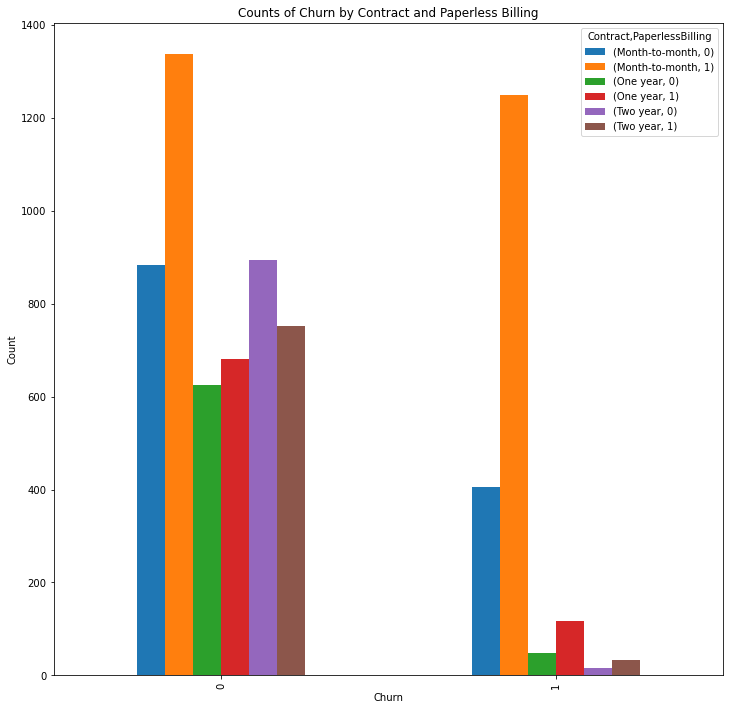

In [44]:
table = pd.crosstab(index = df['Churn'], 
                          columns = [df['Contract'], 
                          df['PaperlessBilling']])
table.plot(kind = 'bar', stacked = False, figsize=(12, 12))

plt.title('Counts of Churn by Contract and Paperless Billing')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.show()

The above graph presents the count of churn (Yes = 1 / No = 0) for each pair of (Contract, Paperlessbilling). The graph shows that maximum churns are produced by the customers who are on month-to-month contract and use paper less billings. Next comes the customers that are on month-to-month contract and prefer paper billings. Overall, maximum churn is produced through the customers who are on month-to-month contract.

### 5. Plot histograms for Tenure, TotalCharges and Monthlycharges.

Text(0.5, 1.0, 'Histogram for tenure')

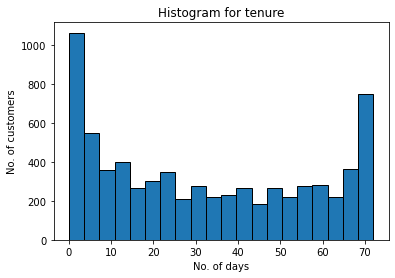

In [45]:
plt.hist(df['tenure'], 20, edgecolor='black');

plt.xlabel('No. of days')
plt.ylabel('No. of customers')
plt.title('Histogram for tenure')

Maximum number of customers are using the service either for very short amount of time (0-10 days), or for around 70 days.

Text(0.5, 1.0, 'Total Charges')

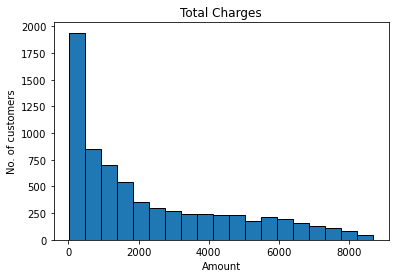

In [46]:
plt.hist(df['TotalCharges'], 19, edgecolor='black');

plt.xlabel('Amount')
plt.ylabel('No. of customers')
plt.title('Total Charges')

A huge number of customers are using the services provided by the company at very lower prices. 

Text(0.5, 1.0, 'Histogram for monthly Charges')

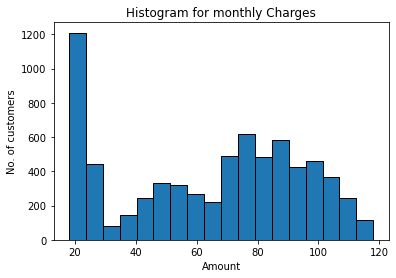

In [47]:
plt.hist(df['MonthlyCharges'], 18, edgecolor='black');

plt.xlabel('Amount')
plt.ylabel('No. of customers')
plt.title('Histogram for monthly Charges')

Apart from the services provided at very lower price, the graph shows a peak at around 80. That means the services provided at around that price range seems to be popular amongs users.

### 6. Display density plot for TotalCharges vs Churn (Yes/No) and MonthlyCharges vs churn (Yes/No)

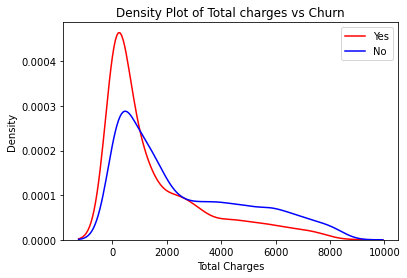

In [49]:
yes = df[df['Churn'] == 1]
no = df[df['Churn'] == 0]

sns.kdeplot(yes['TotalCharges'], color='red', label='Yes')
sns.kdeplot(no['TotalCharges'], color='blue', label='No')

plt.legend()
plt.title('Density Plot of Total charges vs Churn')
plt.xlabel('Total Charges')
plt.ylabel('Density')

plt.show()

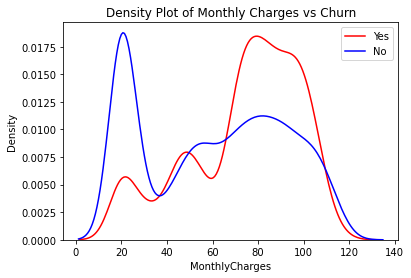

In [50]:
sns.kdeplot(yes['MonthlyCharges'], color='red', label='Yes')
sns.kdeplot(no['MonthlyCharges'], color='blue', label='No')

plt.legend()
plt.title('Density Plot of Monthly Charges vs Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')

plt.show()

The density plot tells that the maximum customers likely to churn are the ones who pays a monthly charge in the range of 60-120. 